In [11]:
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from growingspheres import counterfactuals as cf

PATH = ''

# Example: Growing Spheres for 1 prediction

### 2D Illustrative

In [12]:
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble, tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt

X,y = datasets.make_moons(n_samples = 200, shuffle=True, noise=0.05, random_state=0)
X = (X.copy() - X.mean(axis=0))/X.std(axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#clf = ensemble.RandomForestClassifier(n_estimators=200, max_depth=3)
clf = SVC(gamma=1, probability=True)
#clf = tree.DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_train, y_train)
print(' ### Accuracy:', sum(clf.predict(X_test) == y_test)/y_test.shape[0])

def plot_classification_contour(X, clf, ax=[0,1]):
    ## Inspired by scikit-learn documentation
    h = .02  # step size in the mesh
    cm = plt.cm.RdBu
    x_min, x_max = X[:, ax[0]].min() - .5, X[:, ax[0]].max() + .5
    y_min, y_max = X[:, ax[1]].min() - .5, X[:, ax[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    #plt.sca(ax)
    plt.contourf(xx, yy, Z, alpha=.5, cmap=cm)


 ### Accuracy: 1.0


In [13]:
cf_list = []
cnt = 0
X_test_class0 = X_test[np.where(y_test == 0)]
for obs in X_test_class0:
    print(obs.shape)
    print('====================================================', cnt)
    CF = cf.CounterfactualExplanation(obs, clf.predict, method='GS')
    CF.fit(n_in_layer=2000, first_radius=0.1, dicrease_radius=10, sparse=True, verbose=True)
    cf_list.append(CF.enemy)
    cnt += 1
cf_list = np.array(cf_list) 

plot_classification_contour(X_test, clf)
plt.scatter(X_test_class0[:, 0], X_test_class0[:, 1], marker='o', edgecolors='k', alpha=0.9, color='red')
plt.scatter(cf_list[:, 0], cf_list[:, 1], marker='o', edgecolors='k', alpha=0.9, color='green')
plt.title('Test instances (red) and their generated counterfactuals (green)')
plt.tight_layout()

(2,)
==================================================== 0
0 ennemies found in initial sphere. Zooming in...
Exploring...
Final number of iterations:  35
Final radius:  (0.6220000000000002, 0.6400000000000002)
Final number of ennemies:  26
Feature selection...
Reduced 0 coordinates
(2,)
==================================================== 1
0 ennemies found in initial sphere. Zooming in...
Exploring...
Final number of iterations:  39
Final radius:  (0.6940000000000003, 0.7120000000000003)
Final number of ennemies:  41
Feature selection...
Reduced 0 coordinates
(2,)
==================================================== 2
0 ennemies found in initial sphere. Zooming in...
Exploring...
Final number of iterations:  45
Final radius:  (0.8020000000000004, 0.8200000000000004)
Final number of ennemies:  39
Feature selection...
Reduced 0 coordinates
(2,)
==================================================== 3
0 ennemies found in initial sphere. Zooming in...
Exploring...


KeyboardInterrupt: 

# Distance and sparsity over datasets

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble, tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
#import xgboost as xgb

#X,y = datasets.make_moons(n_samples = 200, shuffle=True, noise=0.05, random_state=0)

'''ONLINE NEWS POPULARITY'''
# df = pd.read_csv('datasets/newspopularity.csv', header=0, nrows=10000)
df = datasets.fetch_openml(data_id=4545)
data = df.data[:10000, :]
y = df.target[:10000]
y = np.array([int(x>=1400) for x in y])
print(df.feature_names[2:-1])
X = np.array(data[:, 2:-1])

X = (X.copy() - X.mean(axis=0))/X.std(axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print('X_test shape:', X_test.shape)



clf = ensemble.RandomForestClassifier(n_estimators=200, max_depth=None, n_jobs=-1)
clf = clf.fit(X_train, y_train)
print(' ### Accuracy:', sum(clf.predict(X_test) == y_test)/y_test.shape[0])

def plot_classification_contour(X, clf, ax=[0,1]):
    ## Inspired by scikit-learn documentation
    h = .02  # step size in the mesh
    cm = plt.cm.RdBu
    x_min, x_max = X[:, ax[0]].min() - .5, X[:, ax[0]].max() + .5
    y_min, y_max = X[:, ax[1]].min() - .5, X[:, ax[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    #plt.sca(ax)
    plt.contourf(xx, yy, Z, alpha=.5, cmap=cm)

def get_CF_distances(obs, n_in_layer=10000, first_radius=0.1, dicrease_radius=10, sparse=True):
    CF = cf.CounterfactualExplanation(obs, clf.predict, method='GS')
    CF.fit(n_in_layer=n_in_layer, first_radius=first_radius, dicrease_radius=dicrease_radius, sparse=sparse,
           verbose=False)
    out = CF.distances()
    l2, l0 = out['euclidean'], out['sparsity']
    return l2, l0

def get_CF(obs, n_in_layer=2000, first_radius=0.1, dicrease_radius=10, sparse=True):
    CF = cf.CounterfactualExplanation(obs, clf.predict, method='GS')
    CF.fit(n_in_layer=n_in_layer, first_radius=first_radius, dicrease_radius=dicrease_radius, sparse=sparse,
           verbose=False)
    e_tilde = CF.e_star
    e_f = CF.enemy
    return obs, e_tilde, e_f
    
    
def iterate_gs_dataset(n_in_layer=2000, first_radius=0.1, dicrease_radius=10, sparse=True):
    l2_list, l0_list = [], []
    cnt = 0
    for obs in X_test[:10, :]:
        print('====================================================', cnt)
        l2, l0 = get_CF(obs, n_in_layer=n_in_layer, 
                               first_radius=first_radius, 
                               dicrease_radius=dicrease_radius, 
                               sparse=sparse)
        l2_list.append(l2)
        l0_list.append(l0)
        cnt += 1
    return l2_list, l0_list    

['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarit

In [ ]:
%%time
idx = 100
obs_to_interprete = X[idx]
print(clf.predict(X[idx].reshape(1, -1)))
def get_closest_enemy(obs):
    enemies = X_test[np.where((y_test != clf.predict(obs.reshape(1,-1))) & (y_test == clf.predict(X_test)))]
    idx, dist = metrics.pairwise_distances_argmin_min(obs.reshape(1,-1), enemies)
    return dist

from sklearn import metrics
x, e_tilde, e_f =get_CF(obs_to_interprete, n_in_layer=10000, first_radius=0.1, dicrease_radius=100)

print((e_f - x != 0).sum())

[0]
10
CPU times: user 9.44 s, sys: 840 ms, total: 10.3 s
Wall time: 9.27 s


In [ ]:
#vars_ = ['crim', 'zn', 'indus','chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
vars_ = [' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity']


for dvar, coord in list(zip(enumerate(vars_), e_f - x)):
    
    if coord!=0:
        print('variable: ', dvar[1])
        print('initial value:', X[idx, dvar[0]])
        print('move:')
        print(coord * X[dvar[0]].std())
print('===================')
print(sorted(list(zip(vars_, e_f - x)), key=lambda x: -abs(x[1])))
        

variable:   n_tokens_content
initial value: -0.8429273698046217
move:
-0.0049728346028276756
variable:   kw_max_min
initial value: 0.2968039352466712
move:
0.007484425251280974
variable:   kw_avg_avg
initial value: 0.6404847169874107
move:
0.013848749254166447
variable:   self_reference_min_shares
initial value: -0.034209598523858666
move:
-0.05642614451495975
variable:   self_reference_max_shares
initial value: -0.13921057362681094
move:
-0.018779777993987244
variable:   self_reference_avg_sharess
initial value: -0.10316992834653013
move:
0.03195995020293441
variable:   LDA_00
initial value: -0.6139198409926339
move:
-0.012024534551028402
variable:   LDA_01
initial value: -0.5025852810983442
move:
-0.0019172236156793556
variable:   LDA_02
initial value: -0.5514977945330819
move:
-0.037615297216567
variable:   LDA_04
initial value: -0.7530089672204197
move:
-0.02525521838692655
[(' self_reference_min_shares', -0.06515624163248929), (' self_reference_avg_sharess', 0.03480947405735328), 

# Out of distribution CF

(120, 2) (30, 2)


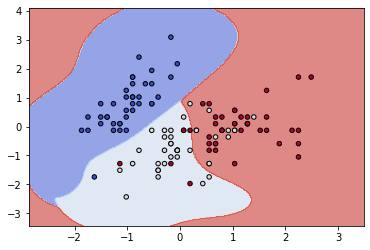

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from growingspheres import counterfactuals as cf
from sklearn.svm import SVC

PATH = ''


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def get_CF(obs, n_in_layer=2000, first_radius=0.1, dicrease_radius=10, sparse=True, target_class=None):
    CF = cf.CounterfactualExplanation(obs, clf.predict, method='GS', target_class=target_class)
    CF.fit(n_in_layer=n_in_layer, first_radius=first_radius, dicrease_radius=dicrease_radius, sparse=sparse,
           verbose=False)
    print('target class', CF.target_class)
    e_tilde = CF.e_star
    e_f = CF.enemy
    return obs, e_tilde, e_f
    



# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
X = (X.copy() - X.mean(axis=0))/X.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
print(X_train.shape, X_test.shape)
clf = SVC(C=1.0, gamma=1.0, probability=True).fit(X_train, y_train)


fig, ax = plt.subplots()

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()



In [ ]:
obs_to_interprete = np.array([-1.1, 2.1])# X_test[2]
_, _, CF = get_CF(obs_to_interprete, n_in_layer=1000, first_radius=0.1, dicrease_radius=100.0, target_class=2)


target class 2


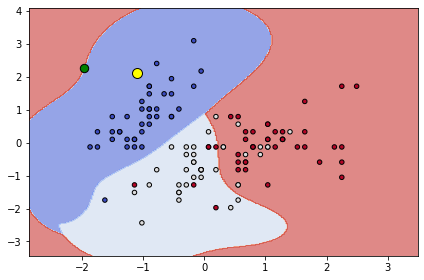

In [ ]:

AX1, AX2 = 0, 1
fig, ax = plt.subplots()

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
#plt.scatter(X_train[:, AX1], X_train[:, AX2], color=[['red', 'blue', 'green'][x] for x in y_train], alpha=0.3, marker='+')
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

ax.scatter(obs_to_interprete[AX1], obs_to_interprete[AX2], color='yellow', s=100, edgecolors='k')
ax.scatter(CF[AX1], CF[AX2], color='green', s=70, edgecolors='k')
fig.tight_layout()
plt.savefig(PATH + 'discussion_iris.pdf', bbox_inches='tight')
plt.show()